In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import pandas_profiling

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('src/data/data.csv')

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
X = df.drop("C_SEV", axis=1)
y = df["C_SEV"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=407)
combined_train = pd.concat([X_train, y_train], axis=1)

In [5]:
fatal = combined_train[combined_train.C_SEV == 1]

**Research Question 01: What features are indicative of a person not surviving in a car accident?**

**Research Question 02: Given the features( weather, time of the day, road surface, etc.) determine if emergency services would be needed for an accident.**

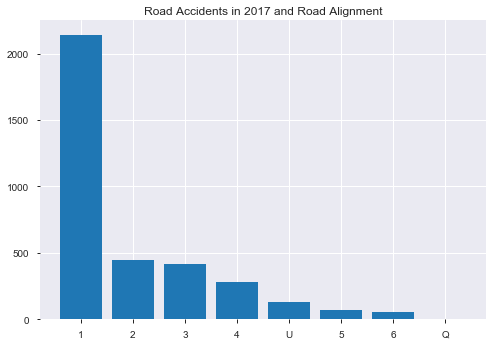

In [6]:
plt.bar(fatal['C_RALN'].value_counts().index, 
        fatal['C_RALN'].value_counts())
plt.title("Road Accidents in 2017 and Road Alignment");

A significant majority of deaths occurred on straight and level roads.

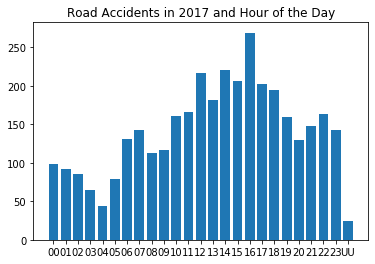

In [17]:
plt.bar(fatal['C_HOUR'].value_counts().sort_index().index, 
        fatal['C_HOUR'].value_counts().sort_index())
plt.title("Road Accidents in 2017 and Hour of the Day");

Most of the fatal accidents occurred between 16:00 to 16:59. The range between 15:00 to 18:00 is particularly high for fatalities as this is likely when more cars on the road as people are going home from work.

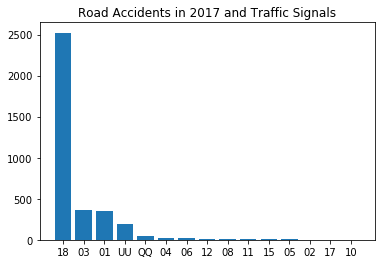

In [18]:
plt.bar(fatal['C_TRAF'].value_counts().index, 
        fatal['C_TRAF'].value_counts())
plt.title("Road Accidents in 2017 and Traffic Signals");

Most of accidents occurred when there was no control present.

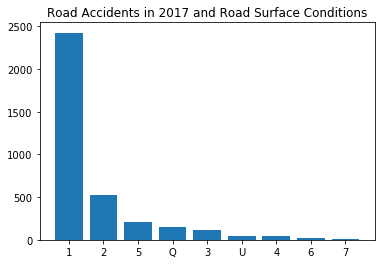

In [19]:
plt.bar(fatal['C_RSUR'].value_counts().index, 
        fatal['C_RSUR'].value_counts())
plt.title("Road Accidents in 2017 and Road Surface Conditions");

Surprisingly most of the fatal accidents occurred in dry/normal conditions. Moreover, the remaining highest categories of accidents occurred in wet and icy conditions.

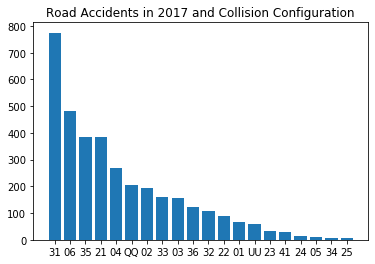

In [20]:
plt.bar(fatal['C_CONF'].value_counts().index, 
        fatal['C_CONF'].value_counts())
plt.title("Road Accidents in 2017 and Collision Configuration");

The most fatal crashes are the ones with head-on collisions. The other highest fatal collisions included right angle collisions and rear-end collisions.

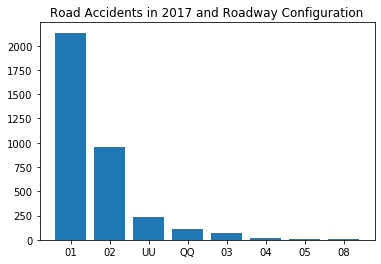

In [21]:
plt.bar(fatal['C_RCFG'].value_counts().index, 
        fatal['C_RCFG'].value_counts())
plt.title("Road Accidents in 2017 and Roadway Configuration");

Most of the fatal accidents occurred at the non-intersection locations (ie: mid-block). The other highest fatal collission occurred at an intersection of at least two public roadways.

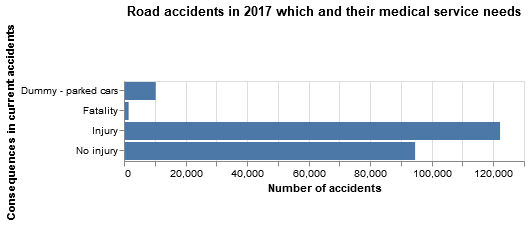

In [4]:
df = pd.read_csv("src/data/data.csv", skip_blank_lines=True)

#Dropping all the column wherein the medical services information isn't available.
df = df[df.P_ISEV != 'U']

#Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'P_ISEV') , 
                                                    df['P_ISEV'], 
                                                    test_size=0.2, 
                                                    random_state=100)

ncdb = pd.concat([X_train, y_train], axis = 1)

medical_encoding = {'1' : 'No injury',
                    '2' : 'Injury',
                    '3' : 'Fatality',
                    'N' : 'Dummy - parked cars',
                    'U' : 'Runaway cars',
                    'X' : 'Jurisdiction does not provide data'}
                    
ncdb['P_ISEV_tr'] = ncdb['P_ISEV'].map(medical_encoding)

med_service = list(ncdb['P_ISEV_tr'].unique())
med_service

q_0 = ncdb.groupby('P_ISEV_tr').agg({'C_CASE' : 'count'}).reset_index()

alt.Chart(q_0).mark_bar().encode(
    alt.Y('P_ISEV_tr:O', 
          title = "Consequences in current accidents"),
    alt.X('C_CASE:Q', 
          title = "Number of accidents")     
         ).properties(title = "Road accidents in 2017 which and their medical service needs")

In [ ]:
# %%time
# #Converting all medical services needed into 1s and 0s)
# medical_encoding = {'1' : 0,
#             '2' : 1,
#             '3' : 1,
#             'N' : 0,
#             'U' : 0,}                    
# ncdb['P_ISEV_tr'] = ncdb['P_ISEV'].map(medical_encoding)

# #Coercing all weekday values into string
# ncdb['C_WDAY'] = ncdb['C_WDAY'].astype('str')

# #Removing the 22 'U' or unknown days and hours of the cases.
# ncdb = ncdb[ncdb.C_WDAY != 'U']
# ncdb = ncdb[ncdb.C_HOUR != 'UU']

# #Transformation for days of the week
# day_week = {'1' : 'Monday',
#             '2' : 'Tuesday',
#             '3' : 'Wednesday',
#             '4' : 'Thursday',
#             '5' : 'Friday',
#             '6' : 'Saturday',
#             '7' : 'Sunday'}

# ncdb['C_WDAY_STR'] = ncdb['C_WDAY'].map(day_week)

# ncdb['C_WDAY_STR'] = pd.Categorical(ncdb['C_WDAY_STR'], ["Monday", 
#                                                         "Tuesday", 
#                                                         "Wednesday", 
#                                                         "Thursday",
#                                                         "Friday",
#                                                         "Saturday",
#                                                         "Sunday"])

# #Grouping by weekday and aggregating by number of accidents
# q1 = ncdb.groupby(['C_WDAY_STR', 'P_ISEV_tr']).agg({'C_CASE' : 'count'}).reset_index()

# alt.Chart(ncdb).mark_bar().encode(
#     alt.Y('C_WDAY_STR:N', 
#           title = "Weekday", 
#           sort = alt.EncodingSortField(order = "ascending")),
#     alt.X('C_HOUR:O', 
#           title = "Hour of the day"),
#     color=alt.Color('P_ISEV_tr:N', title = "EMS Needs")
#          ).properties(title = "Road accidents in 2017 which and their medical service needs")

**Inferential question**

Is the injury rate of sitting on the front row passenger seat different from sitting on the second row left seat?

In [12]:

# joining the splited train data
stack = pd.concat([X_train, y_train], axis=1)

# subsetting columns of interest
needed_col = stack[['P_PSN', 'P_ISEV', 'V_TYPE', 'C_CASE', 'V_ID']]

# filtering column values
filter_PSN = needed_col.loc[needed_col['P_PSN'].isin(['13', '21'])]
filter_V_TYPE = filter_PSN.loc[filter_PSN['V_TYPE'] == '01']
filtered = filter_V_TYPE.loc[filter_V_TYPE['P_ISEV'].isin(['1','2'])]
dat = filtered.apply(pd.to_numeric)

# grouping variable into new categories
dat['seat_position'] = np.where(dat.P_PSN > 20, 'behind driver', 'passenger seat')
dat['injury_class'] = np.where(dat.P_ISEV > 1, 'injury', 'Non-injury')

final_df = dat[dat.duplicated(subset=['C_CASE', 'V_ID'], keep = False)]
# remove error cases
check = final_df.groupby(['C_CASE','V_ID', 'seat_position']).size().reset_index(name='counts')
check2 = check[check['counts']== 1]

# get final cleaned dataframe
final = final_df[(final_df['C_CASE'].isin(check2['C_CASE']) & final_df['V_ID'].isin(check2['V_ID']))]

# pandas_profiling.ProfileReport(final[['row_num', 'injury_class']])

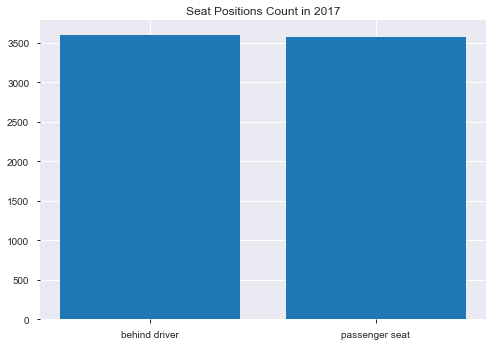

In [15]:
plt.bar(final['seat_position'].value_counts().sort_index().index, 
        final['seat_position'].value_counts().sort_index())
plt.title("Seat Positions Count in 2017");

> According to the seat position count above, we have pretty balanced behind driver and passenger seat cases.

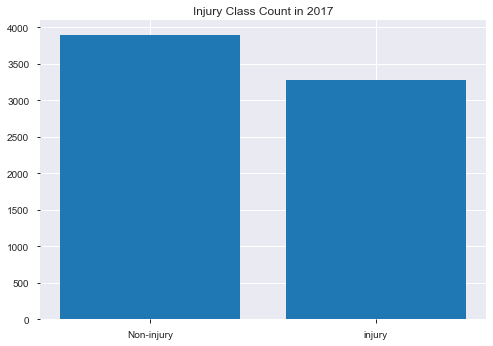

In [17]:
plt.bar(final['injury_class'].value_counts().sort_index().index, 
        final['injury_class'].value_counts().sort_index())
plt.title("Injury Class Count in 2017");

> According to the injury class count above, we have pretty balanced injury and non-injury cases.